# Testing Gym installation

This experimental notebook checks if the Anaconda environment is set up correctly by running some checks and some basic sample Gym code.


## Table of Contents

- Contact information
- Checking requirements
  - Correct anaconda environment
  - Correct module access
- Testing sample Gym setup
  - Mountain car with random agent
    - Setting up the gym environment
    - Interacting with the environment
    - Visualising the environment
    - Letting random agent play the game

<hr><hr>

## Contact information

| Name             | Student ID | VUB mail                                                  | Personal mail                                               |
| ---------------- | ---------- | --------------------------------------------------------- | ----------------------------------------------------------- |
| Lennert Bontinck | 0568702    | [lennert.bontinck@vub.be](mailto:lennert.bontinck@vub.be) | [info@lennertbontinck.com](mailto:info@lennertbontinck.com) |



<hr><hr>

## Checking requirements

### Correct anaconda environment

The `rl-project` anaconda environment should be active to ensure proper support. Installation instructions are available on [the GitHub repository of the RL course project and homeworks](https://github.com/pikawika/vub-rl).

In [1]:
####################################################
# CHECKING FOR RIGHT ANACONDA ENVIRONMENT
####################################################

import os
from platform import python_version

print(f"Active environment: {os.environ['CONDA_DEFAULT_ENV']}")
print(f"Correct environment: {os.environ['CONDA_DEFAULT_ENV'] == 'rl-project'}")
print(f"\nPython version: {python_version()}")
print(f"Correct Python version: {python_version() == '3.8.10'}")

Active environment: rl-project
Correct environment: True

Python version: 3.8.10
Correct Python version: True


<hr>

### Correct module access

The following codeblock will load in all required modules and show if the versions match those that are recommended.

In [3]:
####################################################
# LOADING MODULES
####################################################

# Plotting
import matplotlib; print(f"Matplotlib version (3.5.1 recommended): {matplotlib.__version__}")
import matplotlib.pyplot as plt

# Pygame
import pygame; print(f"Pygame version (2.1.2 recommended): {pygame.__version__}")

# Gym environment
import gym; print(f"Gym version (0.21.0 recommended): {gym.__version__}")

# Time for allowing "freezes" in execution
import time;

# Used for updating notebook display
from IPython import display

Matplotlib version (3.5.1 recommended): 3.5.1
Pygame version (2.1.2 recommended): 2.1.2
Gym version (0.21.0 recommended): 0.21.0


<hr><hr>

## Testing sample Gym setup

### Mountain car with random agent

We start by creating an instance of the mountain car environment and analysing some of its properties.
This is based on the documentation from the [Gym tutorials](https://www.gymlibrary.ml/content/tutorials/), [this one](https://blog.paperspace.com/getting-started-with-openai-gym/) in particular as well as the [mountain car documentation](https://www.gymlibrary.ml/environments/classic_control/mountain_car/).

#### Setting up the gym environment

The `observation_space` defines the structure as well as the legitimate values for the observation of the state of the environment.
The observation can be different things for different environments.
The most common form is a screenshot of the game.
There can be other forms of observations as well, such as certain characteristics of the environment described in vector form.
- The observation for the mountain car environment is a vector of two numbers:
  - Position of the car along the x-axis
  - Velocity of the car

- The middle point between the two mountains is taken to be the origin, with right being the positive direction and left being the negative direction.

Similarly, the `Env` class also defines an attribute called the `action_space`, which describes the numerical structure of the legitimate actions that can be applied to the environment.
- We have three discrete actions:
  - 0: Accelerate to the left
  - 1: Don't accelerate
  - 2: Accelerate to the right

In [4]:
####################################################
# SETTING UP THE GYM ENVIRONMENT
####################################################

# Create an instance of the environment to be used
env = gym.make('MountainCar-v0')

# Get information about the environment
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")

# Reset the environment to start from a clean state, returns the initial observation
observation = env.reset()
print(observation)

# Clean unused variables
del observation

Observation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)
[-0.47035974  0.        ]


#### Interacting with the environment

Next, let's interact with the created environment.

In [5]:
####################################################
# INTERACTING WITH THE ENNVIRONMENT
####################################################

# Take the action of moving to the right
move_right = 2

# Take the action and get the new observation space
new_observation, reward, done, info = env.step(move_right)
print(f"After taking action {move_right}, the new observation is {new_observation}")
print(f"This resulted in a reward of {reward} and a {done} done state")
print(f"Other information given is: {info}")

# Clean unused variables
del new_observation
del reward
del done
del info
del move_right

After taking action 2, the new observation is [-0.46975735  0.0006024 ]
This resulted in a reward of -1.0 and a False done state
Other information given is: {}


#### Visualising the environment

Let's now try to visualize the environment

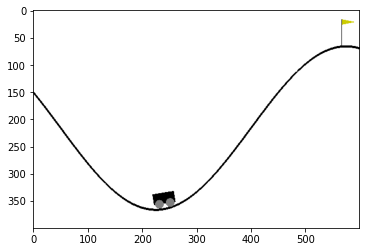

In [9]:
####################################################
# VISUALISING THE ENVIRONMENT
####################################################

# Visualise the environment by making a "screenshot"
env_screenshot = env.render(mode = 'rgb_array')

# Show the "screenshot"
plt.imshow(env_screenshot);

env.close()

# Delete unused variables
del env_screenshot

#### Letting random agent play the game

Let the agent play 200 moves at random in the game and visualise it by updating the plot continiously

In [10]:
####################################################
# VISUALISING THE ENVIRONMENT
####################################################

# Recreate environment as it is closed which causes issues when opening it again
env = gym.make('MountainCar-v0')

# Reset environment
obs = env.reset()

# Show environment in new window
env.render(mode= "human")

for step in range(200):
    # take random action
    action = env.action_space.sample()
    
    # apply the action
    obs, reward, done, info = env.step(action)
    
    # update environment in new window
    env.render(mode= "human")

    # Wait a bit before the next frame unless you want to see a crazy fast video
    time.sleep(0.001)
    
    # If the epsiode is up, then start another one
    if done:
        env.reset()

# Close the environment and thus the popup
env.close()

# Delete unused variables
del action
del done
del info
del obs
del reward
del step
del env